# CORDIC Algorithm
This implementation of CORDIC algorithm in Rotation and Vector mode using python 2.7.

## Description
Cordic algoritihms can be operated in two modes: Rotation mode and Vector mode.
Variables and there description:  

| Variable | Description                         |
|----------|-------------------------------------|
| x        | x-coordinate of initial vector      |
| y        | y-coordinate of initial vector      |
| z        | Initial angle of vector with x-axis |

In [75]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math

from __future__ import division

In [76]:
max_iter = 50

In [77]:
def plot(x_values, y_values, x_label, y_label, plot_label):
    # Plot of Value of gain with number of iterations
    fig = plt.figure();
    ax = fig.add_subplot(111);

    line, = ax.plot(x_values, y_values,  lw=2);

    ax.set_title(plot_label);
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    plt.show();
    plt.close();
    return;

# Modes of CORDIC Algorithms
CORDIC algorithms is usualy operated in one of the following two modes:
* **Rotation mode** 
* **Vector mode**


## Rotation Mode

In rotation mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in rotation mode are:


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \cdot [ x_{0} \cdot cos z_{0} - y_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    x_{n} = A_{n} \cdot [ y_{0} \cdot cos z_{0} + x_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    z_{n} = 0
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

### Value of A$_{n}$ as n $\rightarrow$ $\infty$

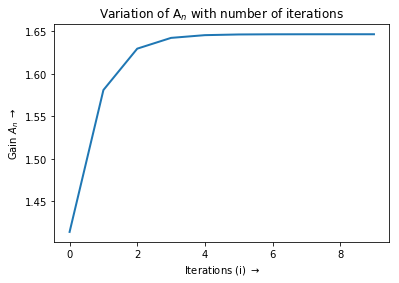

Gain of the system is 1.64675921114


In [105]:
gain_val_list = [math.sqrt(2)];  # Stores value of gain after each iteration 
max_iter_gain = 10;              # Max number of iterations for calculating value of gain
iterations_list = [0];           # List that Stores the number of iterations performed

for i in range (1, max_iter_gain):
    gain_val_list.append(gain_val_list[i-1] * math.sqrt(1 + 2**(-2 * i)));
    iterations_list.append(i);

# Plot for value of gain with each iteration
plot(iterations_list, gain_val_list, 'Iterations (i) $\\rightarrow$', 'Gain $A_{n}$ $\\rightarrow$',
     'Variation of A$_{n}$ with number of iterations');
print "Gain of the system is " + str(gain_val_list[len(gain_val_list) - 1]);

As evident from the plot above A$_{n}$ $\approx$ 1.647 as n $\rightarrow$ $\infty$. A$_{n}$ is also reffered as the gain of the system.

In [79]:
a = 0.607252935;

angle = 12; # degrees
cosine_list = [];
sin_list = [];
iterations_list = [];

In [80]:
i = 0;                  # Keeps count on number of iterations

current_x = a;          # Value of X on ith iteration 
current_y = 0;          # Value of Y on ith iteration
current_z = angle;      # Value of Z on ith iteration

di = 0;

In [88]:
def rotation_mode(x, y, z, iterations):
    a = 0.607252935;   # = 1/K
    
    x_val_list = [];
    y_val_list = [];
    z_val_list = [];
    iterations_list = [];

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x;          # Value of X on ith iteration 
    current_y = y;          # Value of Y on ith iteration
    current_z = z;          # Value of Z on ith iteration
    
    di = 0;
    
    if (iterations > 0):
        for i in range(iterations):
            if (current_z > 0):
                di = +1;
            else:
                di = -1;
            next_z = current_z - di * math.degrees(math.atan(2**(-1*i)));
            next_x = current_x - di * current_y * 2**(-1*i);
            next_y = current_y + di * current_x * 2**(-1*i);
            
            current_x = next_x;
            current_y = next_y;
            current_z = next_z;

            x_val_list.append(current_x);
            y_val_list.append(current_y);
            z_val_list.append(current_z);
            
            iterations_list.append(i);
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list, };


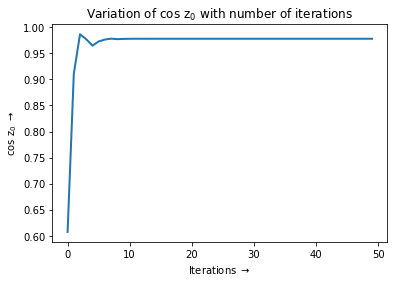

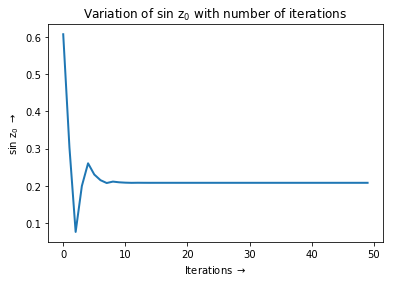

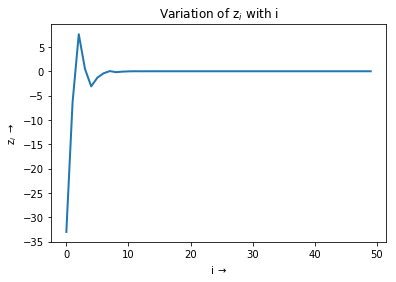

In [107]:
a = 0.607252935;

angle = 12; # degrees

result_dict = rotation_mode(a, 0, angle, max_iter);

# plot(x_values, y_values, x_label, y_label, plot_label):
plot(result_dict['iteration'], result_dict['x'], 'Iterations $\\rightarrow$', 'cos z$_{0}$ $\\rightarrow$', 'Variation of cos z$_{0}$ with number of iterations');
plot(result_dict['iteration'], result_dict['y'], 'Iterations $\\rightarrow$', 'sin z$_{0}$ $\\rightarrow$', 'Variation of sin z$_{0}$ with number of iterations');
plot(result_dict['iteration'], result_dict['z'], 'i $\\rightarrow$', 'z$_{i}$ $\\rightarrow$', 'Variation of z$_{i}$ with i');


# Vector mode

In [ ]:
def vector_mode(x, y, z, iterations):
    a = 0.607252935;   # = 1/K
    
    i = 0;                  # Keeps count on number of iterations
    
    current_x = x;          # Value of X on ith iteration 
    current_y = y;      # Value of Y on ith iteration
    current_z = z;          # Value of Z on ith iteration
    
    di = 0;
    
    if (iterations > 0):
        for i in range(iterations):
            if (current_y < 0):
                di = +1;
            else:
                di = -1;
            next_z = current_z - di * math.degrees(math.atan(2**(-1*i)));
            next_x = current_x - di * current_y * 2**(-1*i);
            next_y = current_y + di * current_x * 2**(-1*i);
            
            #print current_z;
            
            current_x = next_x;
            current_y = next_y;
            current_z = next_z;
    return { 'atan':current_z};


## Calculations for magnitude of vector

In [ ]:
mag_list = [];
iterations_list = [];

i = 10;
for i in range(1, max_iter):
    iterations_list.append(i);
    atan_list.append(vector_mode(1, 12, 0, i)['atan']);

## Plot for tan$^{-1}$(y) with number of iterations

In [ ]:
# Plot for cos
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, atan_list,  lw=2);

ax.set_title('Variation of tan$^{-1}$(Y) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('tan$^{-1}$(Y) $\Rightarrow$');
plt.show();
plt.close();

print "Expected value: " + str(math.degrees(math.atan(12))) + ", Got: " + str(atan_list[max_iter - 2]);

## Calculations for tan$^{-1}$(y)

In [ ]:
atan_list = [];
iterations_list = [];

i = 10;
for i in range(1, max_iter):
    iterations_list.append(i);
    atan_list.append(vector_mode(1, 12, 0, i)['atan']);

## Plot for tan$^{-1}$(y) with number of iterations

In [ ]:
# Plot for cos
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, atan_list,  lw=2);

ax.set_title('Variation of tan$^{-1}$(Y) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('tan$^{-1}$(Y) $\Rightarrow$');
plt.show();
plt.close();

print "Expected value: " + str(math.degrees(math.atan(12))) + ", Got: " + str(atan_list[max_iter - 2]);

## Magnitude of a vector

# References
1. [*A survey of CORDIC algorithms for FPGA based computers*](http://portal.acm.org/citation.cfm?doid=275107.275139) by Andraka, Ray (1998).
2. *Cordic_Architeutre - QIP STC-Image Processing using VLSI architecture* by Das, Bishnu Prasad (2016)